In [2]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import scipy
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler

In [4]:
# model imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# processing imports
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


Compiling Dataset into Readable Format

In [5]:

# add the column labels
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])


df=pd.read_csv('/content/drive/MyDrive/KDDTrain+.txt',header=None,names=columns)
test_df = pd.read_csv('/content/drive/MyDrive/KDDTest+.txt',header=None,names=columns)

In [6]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [7]:
test_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


Understanding the Data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

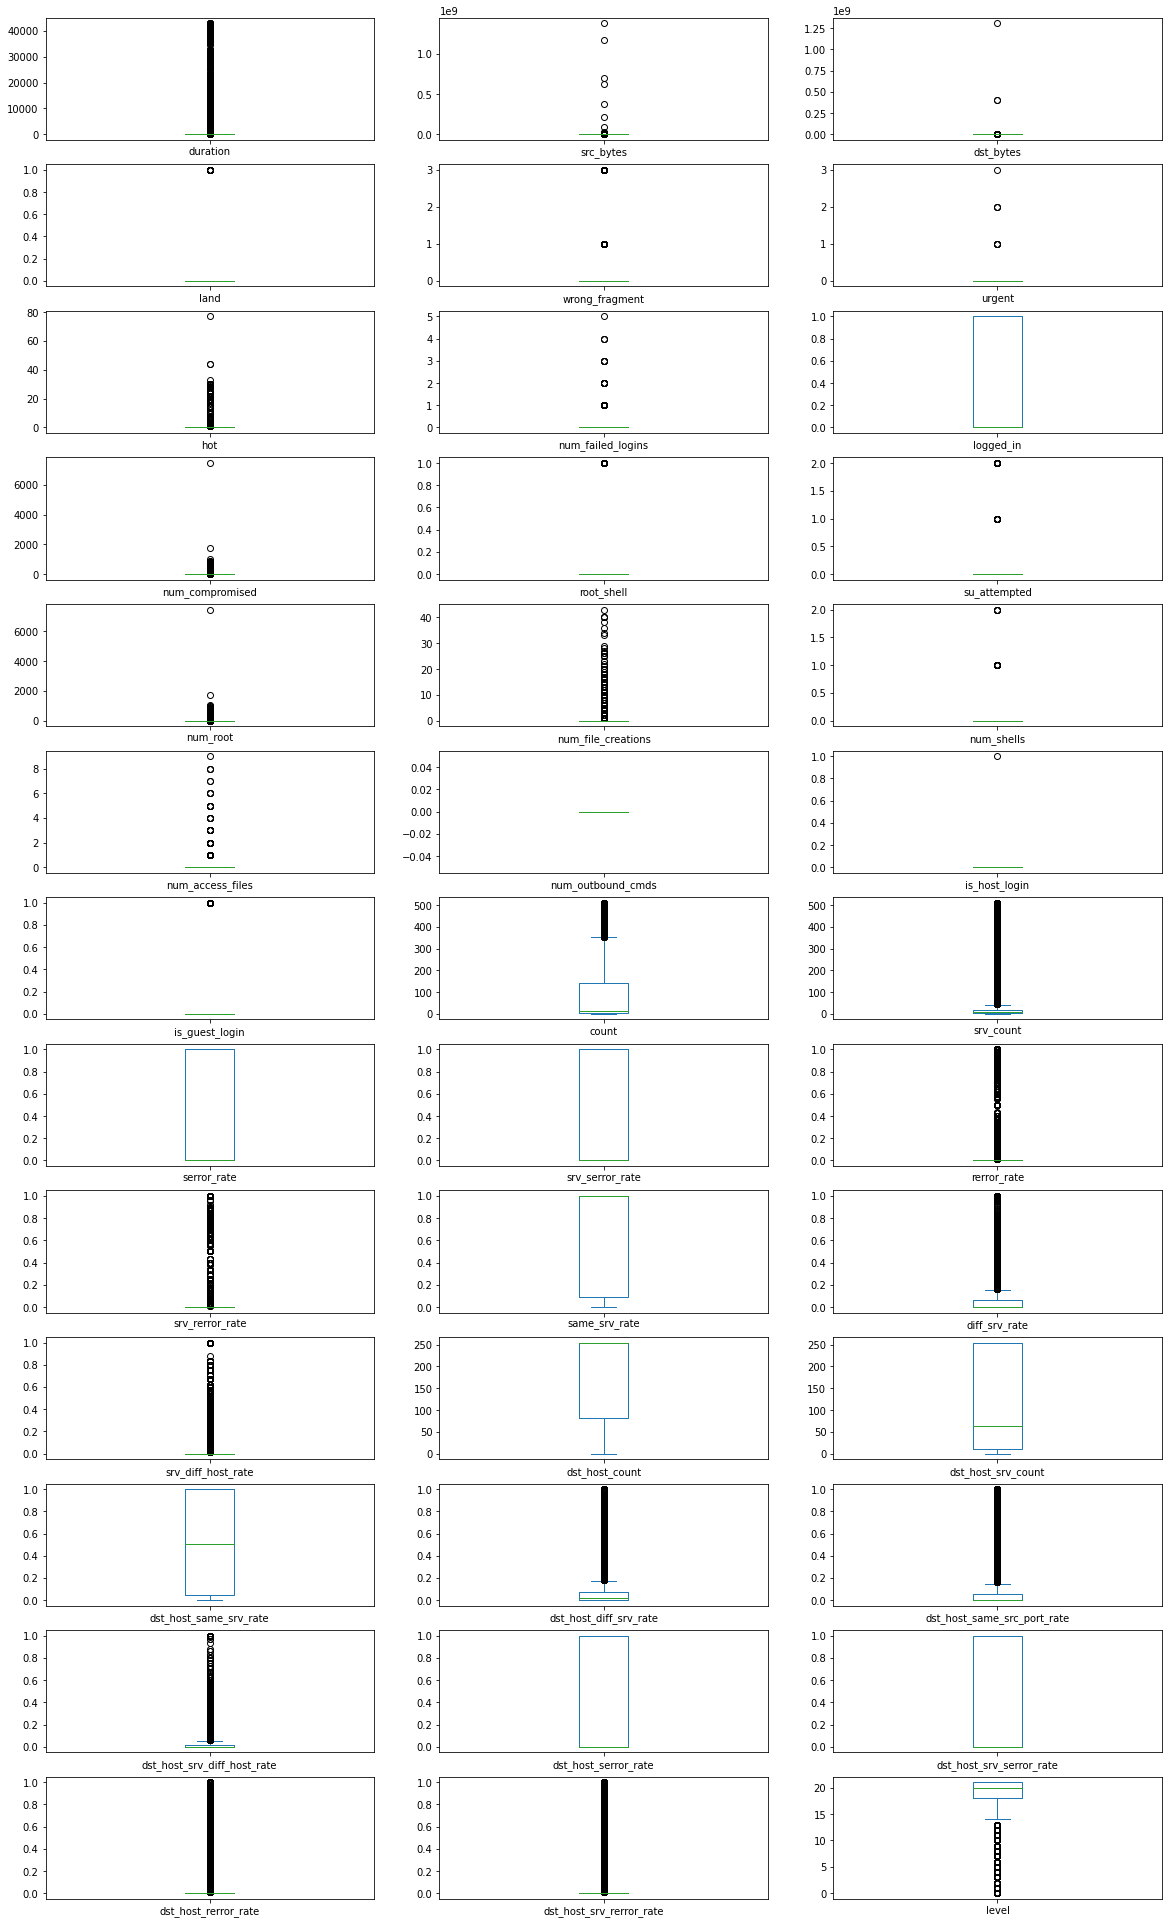

In [11]:
df.plot(kind='box',subplots=1,layout=(15,3),figsize=(20,40))
plt.show()

In [12]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [13]:
df.select_dtypes(['object']).columns

Index(['protocol_type', 'service', 'flag', 'attack'], dtype='object')

Creating Classification Labels

In [14]:
dos_attacks = ['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm']
probe_attacks = ['ipsweep','mscan','nmap','portsweep','saint','satan']
privilege_attacks = ['buffer_overflow','loadmdoule','perl','ps','rootkit','sqlattack','xterm']
access_attacks = ['ftp_write','guess_passwd','http_tunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xclock','xsnoop']

common_attacks = dos_attacks + probe_attacks
uncommon_attacks = privilege_attacks + access_attacks

attack_labels = ['Normal','Common Attacks', 'Uncommon Attacks']

# helper function to pass to data frame mapping
def map_attack(attack):
    if attack in common_attacks:
        attack_type = 1
    elif attack in uncommon_attacks:
        attack_type = 2
    else:
        # normal maps to 0
        attack_type = 0
        
    return attack_type

attack_map = df.attack.apply(map_attack)
df['attack_map'] = attack_map

test_attack_map = test_df.attack.apply(map_attack)
test_df['attack_map'] = test_attack_map

# view the result
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_map
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,0
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,0


In [15]:
df['attack_map'].value_counts()

0    67352
1    57583
2     1038
Name: attack_map, dtype: int64

In [16]:
is_attack = df.attack.map(lambda a: 0 if a == 'normal' else 1)
test_attack = test_df.attack.map(lambda a: 0 if a == 'normal' else 1)

#data_with_attack = df.join(is_attack, rsuffix='_flag')
df['attack_flag'] = is_attack
test_df['attack_flag'] = test_attack

# view the result
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_map,attack_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,0,0
1,0,udp,other,SF,146,0,0,0,0,0,...,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,0,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,1,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,0,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,0,0


EDA 

In [17]:
attack_vs_protocol_map = pd.crosstab(df.attack_map, df.protocol_type)
attack_vs_protocol_map

protocol_type,icmp,tcp,udp
attack_map,,,
0,1309,53609,12434
1,6982,48045,2556
2,0,1035,3


In [18]:
attack_vs_protocol = pd.crosstab(df.attack, df.protocol_type)
attack_vs_protocol

protocol_type,icmp,tcp,udp
attack,,,
back,0,956,0
buffer_overflow,0,30,0
ftp_write,0,8,0
guess_passwd,0,53,0
imap,0,11,0
ipsweep,3117,482,0
land,0,18,0
loadmodule,0,9,0
multihop,0,7,0


In [19]:
import itertools

def bake_pies(data_list,labels):
    list_length = len(data_list)
    
    # setup for mapping colors
    color_list = sns.color_palette()
    color_cycle = itertools.cycle(color_list)
    cdict = {}
    
    # build the subplots
    fig, axs = plt.subplots(1, list_length,figsize=(18,10), tight_layout=False)
    plt.subplots_adjust(wspace=1/list_length)
    
    # loop through the data sets and build the charts
    for count, data_set in enumerate(data_list): 
        
        # update our color mapt with new values
        for num, value in enumerate(np.unique(data_set.index)):
            if value not in cdict:
                cdict[value] = next(color_cycle)
       
        # build the wedges
        wedges,texts = axs[count].pie(data_set,
                           colors=[cdict[v] for v in data_set.index])

        # build the legend
        axs[count].legend(wedges, data_set.index,
                           title="Flags",
                           loc="center left",
                           bbox_to_anchor=(1, 0, 0.5, 1))
        # set the title
        axs[count].set_title(labels[count])
        
    return axs   

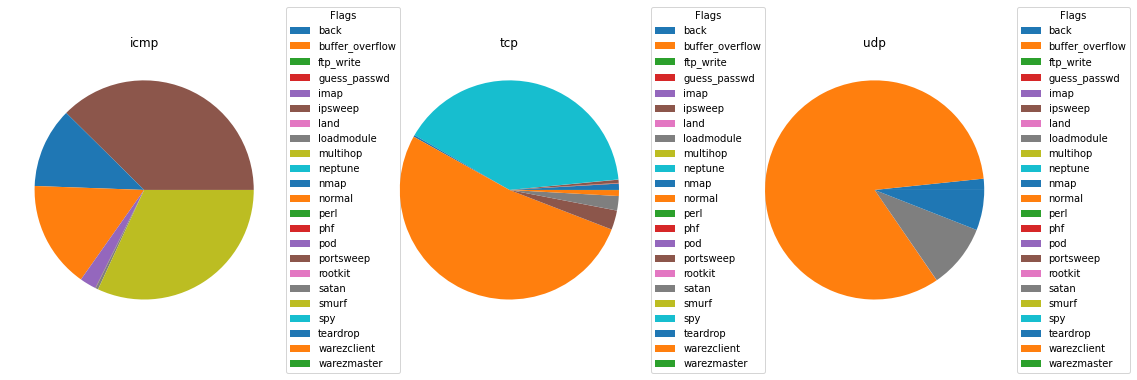

In [20]:
icmp_attacks = attack_vs_protocol.icmp
tcp_attacks = attack_vs_protocol.tcp
udp_attacks = attack_vs_protocol.udp

# create the charts
bake_pies([icmp_attacks, tcp_attacks, udp_attacks],['icmp','tcp','udp'])
plt.show()

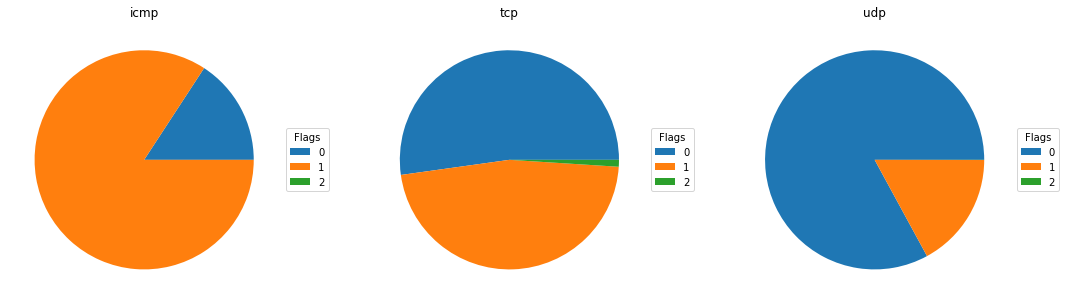

In [21]:
icmp_attacks = attack_vs_protocol_map.icmp
tcp_attacks = attack_vs_protocol_map.tcp
udp_attacks = attack_vs_protocol_map.udp

# create the charts
bake_pies([icmp_attacks, tcp_attacks, udp_attacks],['icmp','tcp','udp'])
plt.show()

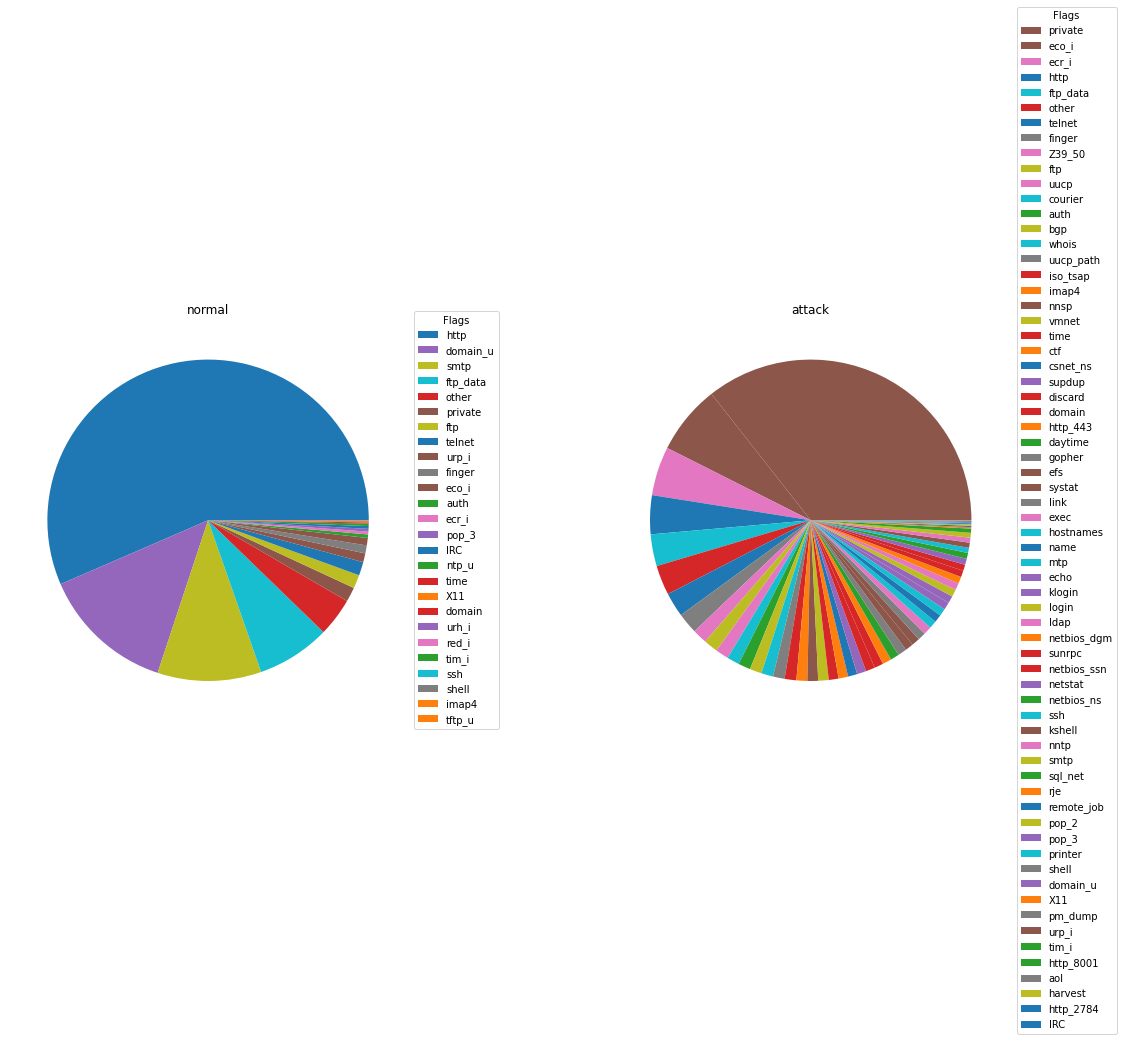

In [22]:
normal_services = df.loc[df.attack_flag == 0].service.value_counts()
attack_services = df.loc[df.attack_flag == 1].service.value_counts()

# create the charts
service_axs = bake_pies([normal_services, attack_services], ['normal','attack'])        
plt.show()

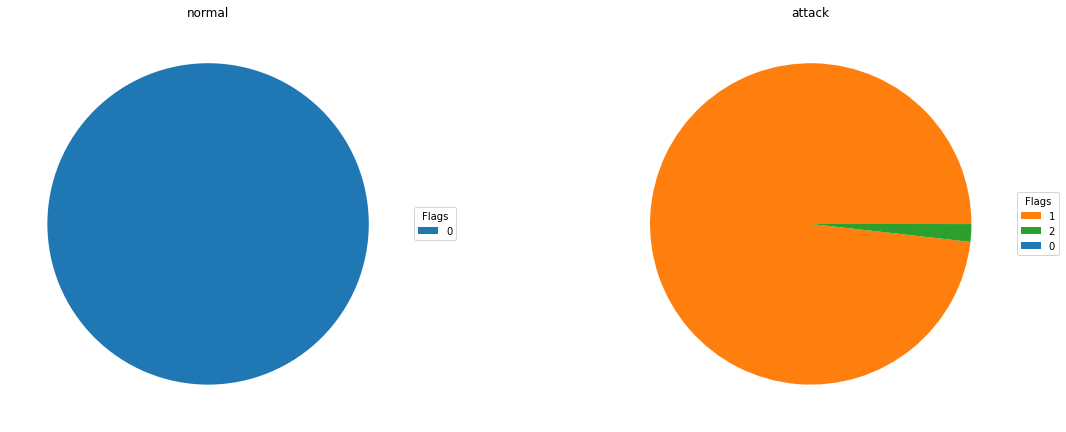

In [23]:
normal_services_map = df.loc[df.attack_flag == 0].attack_map.value_counts()
attack_services_map = df.loc[df.attack_flag == 1].attack_map.value_counts()

# create the charts
service_axs = bake_pies([normal_services_map, attack_services_map], ['normal','attack'])        
plt.show()

Feature Engineering

In [24]:
features_to_encode = ['protocol_type', 'service', 'flag']
encoded = pd.get_dummies(df[features_to_encode])
test_encoded_base = pd.get_dummies(test_df[features_to_encode])

# not all of the features are in the test set, so we need to account for diffs
test_index = np.arange(len(test_df.index))
column_diffs = list(set(encoded.columns.values)-set(test_encoded_base.columns.values))

diff_df = pd.DataFrame(0, index=test_index, columns=column_diffs)

# we'll also need to reorder the columns to match, so let's get those
column_order = encoded.columns.to_list()

# append the new columns
test_encoded_temp = test_encoded_base.join(diff_df)

# reorder the columns
test_final = test_encoded_temp[column_order].fillna(0)

# get numeric features, we won't worry about encoding these at this point
numeric_features = ['duration', 'src_bytes', 'dst_bytes']

# model to fit/test
to_fit = encoded.join(df[numeric_features])
test_set = test_final.join(test_df[numeric_features])

In [25]:
# create our target classifications
binary_y = df['attack_flag']
multi_y = df['attack_map']

test_binary_y = test_df['attack_flag']
test_multi_y = test_df['attack_map']

# build the training sets
binary_train_X, binary_val_X, binary_train_y, binary_val_y = train_test_split(to_fit, binary_y, test_size=0.4, random_state=52)
multi_train_X, multi_val_X, multi_train_y, multi_val_y = train_test_split(to_fit, multi_y, test_size = 0.4, random_state=45)

In [26]:
# model for the binary classification
binary_model = RandomForestClassifier()
binary_model.fit(binary_train_X, binary_train_y)
binary_predictions = binary_model.predict(binary_val_X)

# calculate and display our base accuracty
base_rf_score = accuracy_score(binary_predictions,binary_val_y)
base_rf_score

0.993530462393332

In [27]:
# define the list of models that we want to test
models = [
    RandomForestClassifier(),
    LogisticRegression(max_iter=250),
    KNeighborsClassifier(),
]

# an empty list to capture the performance of each model
model_comps = []

# walk through the models and populate our list
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, binary_train_X, binary_train_y, scoring='accuracy')
    for count, accuracy in enumerate(accuracies):
        model_comps.append((model_name, count, accuracy))

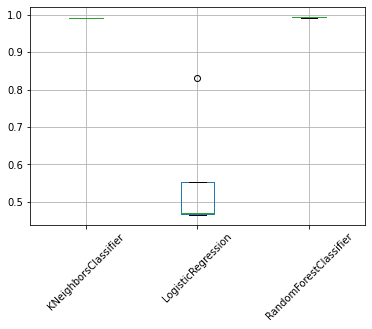

In [28]:
# a box plot will do well to show us overall performance and the variation in the models.
result_df = pd.DataFrame(model_comps, columns=['model_name', 'count', 'accuracy'])
result_df.pivot(index='count',columns='model_name',values='accuracy').boxplot(rot=45)

In [29]:
# a helper function for getting some analytical data about our predictions
def add_predictions(data_set,predictions,y):
    prediction_series = pd.Series(predictions, index=y.index)

    # we need to add the predicted and actual outcomes to the data
    predicted_vs_actual = data_set.assign(predicted=prediction_series)
    original_data = predicted_vs_actual.assign(actual=y).dropna()
    conf_matrix = confusion_matrix(original_data['actual'], 
                                   original_data['predicted'])
    
    # capture rows with failed predictions
    base_errors = original_data[original_data['actual'] != original_data['predicted']]
    
    # drop columns with no value
    non_zeros = base_errors.loc[:,(base_errors != 0).any(axis=0)]

    # idetify the type of error
    false_positives = non_zeros.loc[non_zeros.actual==0]
    false_negatives = non_zeros.loc[non_zeros.actual==1]

    # put everything into an object
    prediction_data = {'data': original_data,
                       'confusion_matrix': conf_matrix,
                       'errors': base_errors,
                       'non_zeros': non_zeros,
                       'false_positives': false_positives,
                       'false_negatives': false_negatives}
    
    return prediction_data


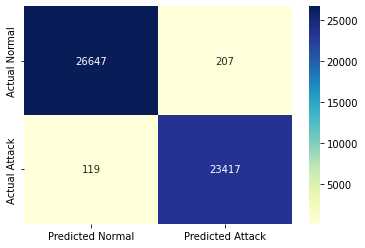

In [30]:
binary_prediction_data = add_predictions(df,
                                         binary_predictions,
                                         binary_val_y)

# create a heatmap of the confusion matrix
sns.heatmap(data=binary_prediction_data['confusion_matrix'],
            xticklabels = ['Predicted Normal','Predicted Attack'],
            yticklabels = ['Actual Normal','Actual Attack'],
            cmap="YlGnBu",
            fmt='d',
            annot=True)

In [31]:
binary_prediction_data['errors'].describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,attack_map,attack_flag,predicted,actual
count,326.000000,3.260000e+02,326.000000,326.000000,326.0,326.000000,326.000000,326.000000,326.000000,326.000000,...,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000
mean,5.233129,2.126942e+06,521.680982,0.006135,0.0,0.006135,0.088957,0.003067,0.067485,0.141104,...,0.050828,0.101442,0.030000,0.334294,0.405368,15.472393,0.401840,0.365031,0.634969,0.365031
std,31.922612,3.840252e+07,4582.185663,0.078205,0.0,0.110770,1.029444,0.055385,0.251245,1.522659,...,0.163211,0.228047,0.131902,0.454573,0.474016,5.304063,0.572065,0.482179,0.482179,0.482179
min,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.010000,0.000000,0.010000,0.015000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.030000,0.060000,0.010000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000,1.000000
max,337.000000,6.933756e+08,70529.000000,1.000000,0.0,2.000000,18.000000,1.000000,1.000000,22.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000,2.000000,1.000000,1.000000,1.000000


In [32]:
# data minus the rows with no variance
binary_prediction_data['non_zeros'].describe()

,duration,src_bytes,dst_bytes,land,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,...,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,attack_map,attack_flag,predicted,actual
count,326.000000,3.260000e+02,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,...,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000
mean,5.233129,2.126942e+06,521.680982,0.006135,0.006135,0.088957,0.003067,0.067485,0.141104,0.006135,...,0.050828,0.101442,0.030000,0.334294,0.405368,15.472393,0.401840,0.365031,0.634969,0.365031
std,31.922612,3.840252e+07,4582.185663,0.078205,0.110770,1.029444,0.055385,0.251245,1.522659,0.078205,...,0.163211,0.228047,0.131902,0.454573,0.474016,5.304063,0.572065,0.482179,0.482179,0.482179
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.010000,0.000000,0.010000,0.015000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.030000,0.060000,0.010000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000,1.000000
max,337.000000,6.933756e+08,70529.000000,1.000000,2.000000,18.000000,1.000000,1.000000,22.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000,2.000000,1.000000,1.000000,1.000000


In [33]:
binary_prediction_data['false_positives'].std()

duration                        14.708437
src_bytes                       64.752691
dst_bytes                      934.436336
land                             0.098056
urgent                           0.000000
hot                              0.098056
num_failed_logins                0.000000
logged_in                        0.168172
num_compromised                  0.000000
root_shell                       0.069505
su_attempted                     0.000000
num_root                         0.625543
num_file_creations               0.000000
num_shells                       0.000000
num_access_files                 0.000000
is_guest_login                   0.000000
count                            1.377436
srv_count                        2.981424
serror_rate                      0.314920
srv_serror_rate                  0.302956
rerror_rate                      0.451226
srv_rerror_rate                  0.454475
same_srv_rate                    0.081123
diff_srv_rate                    0

In [34]:
binary_prediction_data['false_negatives'].std()

duration                       4.860909e+01
src_bytes                      6.356164e+07
dst_bytes                      7.460526e+03
land                           0.000000e+00
urgent                         1.833397e-01
hot                            1.694642e+00
num_failed_logins              9.166985e-02
logged_in                      3.425817e-01
num_compromised                2.507985e+00
root_shell                     9.166985e-02
su_attempted                   9.166985e-02
num_root                       3.866027e+00
num_file_creations             1.989217e+00
num_shells                     2.042840e-01
num_access_files               1.290903e-01
is_guest_login                 1.290903e-01
count                          1.156976e+02
srv_count                      5.999810e+00
serror_rate                    1.635013e-01
srv_serror_rate                2.067335e-01
rerror_rate                    4.341343e-01
srv_rerror_rate                4.514262e-01
same_srv_rate                  3

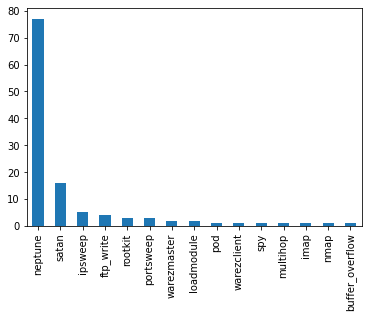

In [35]:
binary_prediction_data['false_negatives'].attack.value_counts().plot.bar()

In [36]:
# we'll need to pull these from the data set
outcomes = ['attack_flag','attack_map', 'actual']

# get the new features we're interested in and drop the outcomes
new_features = (binary_prediction_data['false_positives']==0).all(axis=0)
feature_cols = binary_prediction_data['false_positives'].loc[:,new_features]
feature_cols = feature_cols.drop(outcomes,axis=1)

# Let's get these in a list and take a look
new_feature_columns = list(feature_cols.columns)
new_feature_columns

['urgent',
 'num_failed_logins',
 'num_compromised',
 'su_attempted',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'is_guest_login']

In [37]:
to_fit_new_features = to_fit.join(df[new_feature_columns])

# build the training sets
new_feature_train_X, new_feature_val_X, new_feature_train_y, new_feature_val_y = train_test_split(to_fit_new_features, binary_y)

In [38]:
new_feature_model = RandomForestClassifier()
new_feature_model.fit(new_feature_train_X, new_feature_train_y)
new_feature_predictions = new_feature_model.predict(new_feature_val_X)

# get the score for the model
new_feature_score = accuracy_score(new_feature_predictions,new_feature_val_y)

new_feature_score

0.9939353527656062

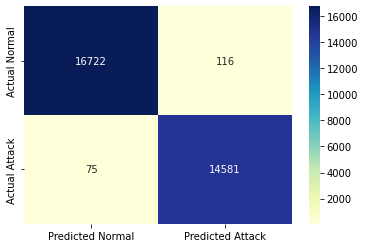

In [39]:
new_prediction_data = add_predictions(df,
                                      new_feature_predictions,
                                      new_feature_val_y)

# create a heatmap of the confusion matrix
sns.heatmap(data=new_prediction_data['confusion_matrix'],
            xticklabels = ['Predicted Normal','Predicted Attack'],
            yticklabels = ['Actual Normal','Actual Attack'],
            cmap="YlGnBu",
            fmt='d',
            annot=True)

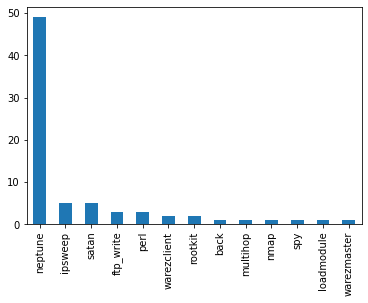

In [40]:
# distribuition of the false negatives--what attacks did we miss?
new_prediction_data['false_negatives'].attack.value_counts().plot.bar()

In [41]:
full_model = RandomForestClassifier(random_state=1)
full_model.fit(to_fit, binary_y)
full_predictions = full_model.predict(test_set)

# get the score
full_score = accuracy_score(full_predictions,test_binary_y)
full_score

0.801499290276792

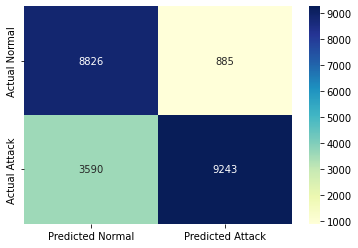

In [42]:
full_prediction_data = add_predictions(test_df, full_predictions, test_binary_y)

# create a heatmap of the confusion matrix
sns.heatmap(data=full_prediction_data['confusion_matrix'],
            xticklabels = ['Predicted Normal','Predicted Attack'],
            yticklabels = ['Actual Normal','Actual Attack'],
            cmap="YlGnBu",
            fmt='d',
            annot=True)

In [43]:
# create our label encoder
label_encoder = LabelEncoder()

# get the intial set of encoded features and encode them
features_to_encode = ['protocol_type', 'flag']
dummy_encoded = pd.get_dummies(df[features_to_encode])
test_dummy_encoded = pd.get_dummies(test_df[features_to_encode])

# now we'll label encode the service column
label_encoder.fit(df.service)
dummy_encoded['service'] = label_encoder.transform(df.service)
test_dummy_encoded['service'] = label_encoder.transform(test_df.service)

# get numeric features, we won't worry about encoding these at this point
numeric_features = ['duration', 'src_bytes', 'dst_bytes']

# model to fit/test
to_fit = dummy_encoded.join(df[numeric_features])
test_set = test_dummy_encoded.join(test_df[numeric_features])

# make sure our columns match
print(to_fit.columns)
print(test_set.columns)

Index(['protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp',
       'flag_OTH', 'flag_REJ', 'flag_RSTO', 'flag_RSTOS0', 'flag_RSTR',
       'flag_S0', 'flag_S1', 'flag_S2', 'flag_S3', 'flag_SF', 'flag_SH',
       'service', 'duration', 'src_bytes', 'dst_bytes'],
      dtype='object')
Index(['protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp',
       'flag_OTH', 'flag_REJ', 'flag_RSTO', 'flag_RSTOS0', 'flag_RSTR',
       'flag_S0', 'flag_S1', 'flag_S2', 'flag_S3', 'flag_SF', 'flag_SH',
       'service', 'duration', 'src_bytes', 'dst_bytes'],
      dtype='object')


In [44]:
# build the training sets
multi_feature_train_X, multi_feature_val_X, multi_feature_train_y, multi_feature_val_y = train_test_split(to_fit_new_features, multi_y)

In [45]:
# model for the mulit classification
multi_model = RandomForestClassifier()
multi_model.fit(multi_feature_train_X, multi_feature_train_y)
multi_predictions = multi_model.predict(multi_feature_val_X)

# get the score
accuracy_score(multi_predictions,multi_feature_val_y)

0.9938718486060837

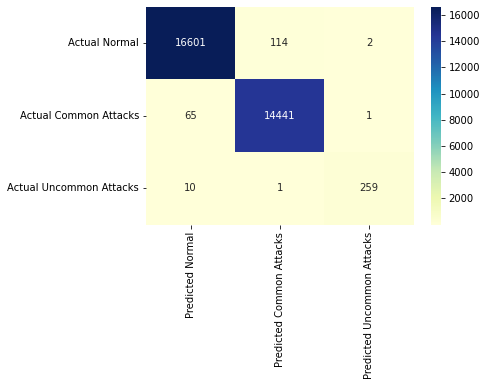

In [46]:
multi_prediction_data = add_predictions(df, multi_predictions, multi_feature_val_y)

# create a heatmap of the confusion matrix
sns.heatmap(data=multi_prediction_data['confusion_matrix'],
            xticklabels = ['Predicted ' + x for x in attack_labels],
            yticklabels = ['Actual ' + x for x in attack_labels],
            cmap="YlGnBu",
            fmt='d',
            annot=True)

In [47]:
# add new features
to_fit_new_features = to_fit.join(df[new_feature_columns])
test_set_new_features = test_set.join(test_df[new_feature_columns])

In [48]:
# fit on the full data set
multi_model.fit(to_fit_new_features, multi_y)
full_multi_predictions = multi_model.predict(test_set_new_features)

# get the score
accuracy_score(full_multi_predictions,test_multi_y)

0.7768807665010646

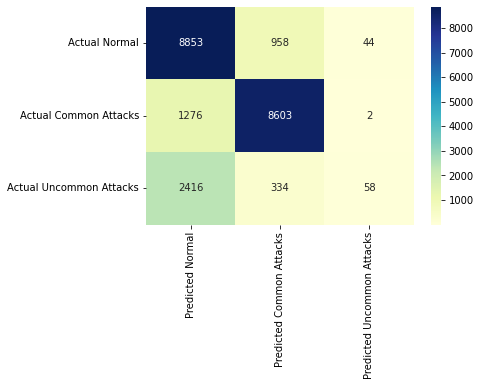

In [49]:
# build our prediction data
multi_prediction_data = add_predictions(df, full_multi_predictions, test_multi_y)

# create a heatmap of the confusion matrix
sns.heatmap(data=multi_prediction_data['confusion_matrix'],
            xticklabels = ['Predicted ' + x for x in attack_labels],
            yticklabels = ['Actual ' + x for x in attack_labels],
            cmap="YlGnBu",
            fmt='d',
            annot=True)

Siamese Neural Network - Creating Pairs

In [50]:
df['attack_map'].value_counts()

0    67352
1    57583
2     1038
Name: attack_map, dtype: int64

In [51]:
fdf = to_fit
fdf['attack_map'] = df['attack_map']

In [52]:
import random

hd1 = fdf[fdf['attack_map'] == 2].astype('int64')
hd0 = fdf[fdf['attack_map'] == 1].astype('int64')

hd1x = hd1.iloc[:, :-1]
hd1y = hd1.iloc[:, -1]
hd0x = hd0.iloc[:, :-1]
hd0y = hd0.iloc[:, -1]

hd1x = hd1x.to_numpy()
hd1y = hd1y.to_numpy()
hd0x = hd0x.to_numpy()
hd0y = hd0y.to_numpy()

p0 = []
p1 = []
label = []

for i in range(150000):
    t1 = random.randint(0, 1037)
    t2 = random.randint(0, 57582)
    p0 += [[hd0x[t2], hd1x[t1]]]
for i in range(75000):
    t1 = random.randint(0, 28789)
    t2 = random.randint(28789, 57582)
    p1 += [[hd0x[t1], hd0x[t2]]]
    t1 = random.randint(0, 517)
    t2 = random.randint(517, 1037)
    p1 += [[hd1x[t1], hd1x[t2]]]

p = []
for i in range(150000):
    p.append(p0[i])
    label.append(0)
    p.append(p1[i])
    label.append(1)

X = np.array(p)
Y = np.array(label)

In [53]:
print(len(hd1x))
print(len(hd0x))
print(len(hd1y))
print(len(hd0y))

1038
57583
1038
57583


In [54]:
Y

array([0, 1, 0, ..., 1, 0, 1])

In [55]:
for _ in range(100):
    p = np.random.permutation(300000)
    X = X[p]
    Y = Y[p]

x_train = X[:240000]
x_test = X[240000:]
y_train = Y[:240000]
y_test = Y[240000:]

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

print(y_train[10:20])

(240000, 2, 18)
(60000, 2, 18)
(240000,)
(60000,)
[1 0 0 0 0 0 0 1 0 1]


In [56]:
from collections import Counter
cc = Counter(y_test)
print(cc[1])
print(cc[0])

30222
29778


In [57]:
cc[1] - cc[0]

444

Compiling the Neural Network

In [58]:
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Dropout, Lambda
from keras.optimizers import RMSprop
from keras import regularizers
from keras import backend as K

def create_base_network(input_shape):
    input = Input(shape =  input_shape)
    x = input
    x = Dense(1024, 
              input_shape = (15,), 
              activation='relu', 
              name = 'D1')(x)
              #activity_regularizer = regularizers.l2(0.01))(x)
    x = Dropout(0.5)(x)
    x = Dense(512, 
              activation='relu', 
              name = 'D2')(x)
              #activity_regularizer = regularizers.l2(0.01))(x)
    x = Dropout(0.5)(x)
    x = Dense(256, 
              activation='relu',
              name = 'D3')(x)
              #activity_regularizer = regularizers.l2(0.01))(x)
    x = Dropout(0.5)(x)
    x = Dense(128, 
              activation='relu',
              name = 'D4')(x)
              #activity_regularizer = regularizers.l2(0.01))(x)
    x = Dropout(0.5)(x)
    x = Dense(64, 
              activation='relu',
              name = 'D5')(x)
              #activity_regularizer = regularizers.l2(0.01))(x)
    return Model(input, x)

def euclidean_distance(vects):
    x, y = vects
    sum_square = K.sum(K.square(x - y), axis = 1, keepdims = True)
    return K.sqrt(K.maximum(sum_square, K.epsilon()))


def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    print(shape1)
    return (shape1[0], 1)


def contrastive_loss(y_true, y_pred):
    margin = 1
    square_pred = K.square(y_pred)
    margin_square = K.square(K.maximum(margin - y_pred, 0))
    return K.mean(y_true * square_pred + (1 - y_true) * margin_square)

def accuracy(y_true, y_pred):
    return K.mean(K.equal(y_true, K.cast(y_pred < 0.5, y_true.dtype)))

In [66]:
input_shape = (18,)
base_network = create_base_network(input_shape)

input_a = Input(shape = input_shape)
input_b = Input(shape = input_shape)

processed_a = base_network(input_a)
processed_b = base_network(input_b)

distance = Lambda(euclidean_distance, 
                  output_shape = eucl_dist_output_shape, 
                  name = 'Distance')([processed_a, processed_b])

model = Model([input_a, input_b], distance)

In [67]:
rms = RMSprop()

model.compile(loss = contrastive_loss, 
              optimizer = rms, 
              metrics=[accuracy])

model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 18)]         0           []                               
                                                                                                  
 input_6 (InputLayer)           [(None, 18)]         0           []                               
                                                                                                  
 model_2 (Functional)           (None, 64)           716736      ['input_5[0][0]',                
                                                                  'input_6[0][0]']                
                                                                                                  
 Distance (Lambda)              (None, 1)            0           ['model_2[0][0]',          

Training

In [68]:
def stats_avg(history, i):
    model_acc = np.array(history.history['accuracy'])
    model_loss = np.array(history.history['loss'])
    print('Average loss:', model_loss.sum()/i)
    print('Average accuracy:', model_acc.sum()/i)

In [69]:
def plots(history):
    plt.plot(history.history['accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    plt.plot(history.history['loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

In [70]:
import tensorflow as tf
tf.config.experimental_run_functions_eagerly(True)

Epoch 1/10
469/469 [==============================] - 28s 59ms/step - loss: 30007943168.0000 - accuracy: 0.5033
Epoch 2/10
469/469 [==============================] - 28s 59ms/step - loss: 1779504.7500 - accuracy: 0.5926
Epoch 3/10
469/469 [==============================] - 28s 59ms/step - loss: 25547.3906 - accuracy: 0.7840
Epoch 4/10
469/469 [==============================] - 28s 59ms/step - loss: 8296.7314 - accuracy: 0.8817
Epoch 5/10
469/469 [==============================] - 28s 60ms/step - loss: 8285.2383 - accuracy: 0.8993
Epoch 6/10
469/469 [==============================] - 28s 59ms/step - loss: 1409814.1250 - accuracy: 0.8994
Epoch 7/10
469/469 [==============================] - 28s 60ms/step - loss: 16983.2188 - accuracy: 0.9001
Epoch 8/10
469/469 [==============================] - 28s 59ms/step - loss: 1335.2468 - accuracy: 0.9004
Epoch 9/10
469/469 [==============================] - 28s 60ms/step - loss: 3758.0554 - accuracy: 0.9062
Epoch 10/10
469/469 [===================

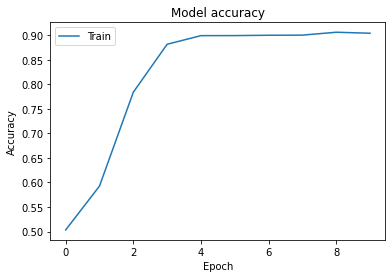

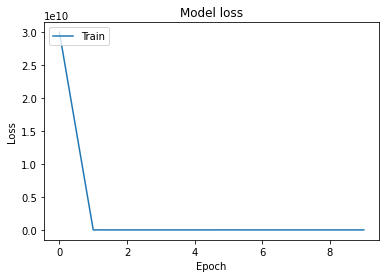

In [71]:
x_train = np.float32(x_train)
y_train = np.float32(y_train)

for i in range(1):
    history = model.fit([x_train[:, 0], x_train[:, 1]], y_train,
          batch_size = 512,
          epochs = 10,
          verbose = 1)
    stats_avg(history, 32)
    plots(history)

In [76]:
p = np.random.permutation(40000)
x_test = x_test[p]
y_test = y_test[p]

X_test = np.float32(x_test)
y_pred = model.predict([x_test[:, 0], x_test[:, 1]])

1250/1250 [==============================] - 16s 13ms/step


In [77]:
evaluation = model.evaluate([x_train[:, 0], x_train[:, 1]], y_train)
print('Loss:', evaluation[0])
print('Accuracy:', evaluation[1])

7500/7500 [==============================] - 150s 20ms/step - loss: 0.1138 - accuracy: 0.8794
Loss: 0.11384721100330353
Accuracy: 0.8793916702270508


In [80]:
y_pred = (y_pred >= 0.5)

In [83]:
confusion_matrix(y_test, y_pred)

[[17501  2329]
 [ 2378 17792]]


In [85]:
accuracy_score(y_pred, y_test)

0.882325